<a href="https://colab.research.google.com/github/zagnouneotmane/Customer-Segmentation./blob/main/customer_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Customer Segmentation**

---



---



## Data Definition

<table class="Data_Definition">
  <thead>
    <tr>
      <th class="header">Label</th>
      <th class="header">Definition</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>ID</td>
      <td>Customer's unique identifier</td>
    </tr>
      <tr>
      <td>Year_Birth</td>
      <td>Customer's birth year</td>
    </tr>
      <tr>
      <td>Education</td>
      <td>Customer's education level</td>
    </tr>
      <tr>
      <td>Marital_Status</td>
      <td>Customer's marital status</td>
    </tr>
      <tr>
      <td>Income</td>
      <td>Customer's yearly household income</td>
    </tr>
      <tr>
      <td>Kidhome</td>
      <td>Number of children in customer's household</td>
    </tr>
      <tr>
      <td>Teenhome</td>
      <td>Number of teenagers in customer's household</td>
    </tr>
      <tr>
      <td>Dt_Customer</td>
      <td>Date of customer's enrollment with the company</td>
    </tr>
      <tr>
      <td>Recency</td>
      <td>Number of days since customer's last purchase</td>
    </tr>
      <tr>
      <td>Complain</td>
      <td>1 if the customer complained in the last 2 years, 0 otherwise</td>
    </tr>
      <tr>
      <td>MntWines</td>
      <td>Amount spent on wine in last 2 years</td>
    </tr>
      <tr>
      <td>MntFruits</td>
      <td>Amount spent on fruits in last 2 years</td>
    </tr>
      <tr>
      <td>MntMeatProducts</td>
      <td>Amount spent on meat in last 2 years</td>
    </tr>
      <tr>
      <td>MntFishProducts</td>
      <td>Amount spent on fish in last 2 years</td>
    </tr>
      <tr>
      <td>MntSweetProducts</td>
      <td>Amount spent on sweets in last 2 years</td>
    </tr>
      <tr>
      <td>MntGoldProds</td>
      <td>Amount spent on gold in last 2 years</td>
    </tr>
      <tr>
      <td>NumDealsPurchases</td>
      <td>Number of purchases made with a discount</td>
    </tr>
      <tr>
      <td>AcceptedCmp1</td>
      <td>1 if customer accepted the offer in the 1st campaign, 0 otherwise</td>
    </tr>
      <tr>
      <td>AcceptedCmp2</td>
      <td>1 if customer accepted the offer in the 2nd campaign, 0 otherwise</td>
    </tr>
      <tr>
      <td>AcceptedCmp3</td>
      <td>1 if customer accepted the offer in the 3rd campaign, 0 otherwise</td>
    </tr>
      <tr>
      <td>AcceptedCmp4</td>
      <td>1 if customer accepted the offer in the 4th campaign, 0 otherwise</td>
    </tr>
      <tr>
      <td>AcceptedCmp5</td>
      <td>1 if customer accepted the offer in the 5th campaign, 0 otherwise</td>
    </tr>
      <tr>
      <td>Response</td>
      <td>1 if customer accepted the offer in the last campaign, 0 otherwise</td>
    </tr>
      <tr>
      <td>NumWebPurchases</td>
      <td>Number of purchases made through the company’s website</td>
   </tr>
      <tr>
      <td>NumCatalogPurchases</td>
      <td>Number of purchases made using a catalogue</td>
   </tr>
      <tr>
      <td>NumWebVisitsMonth</td>
      <td>Number of visits to company’s website in the last month</td>
    </tr>
  </tbody>
</table>

## Importing Libraries and Dataset

<div class="intro" id = "title">Hey! everyone,In this notebook we will work on groceries data with unsupervised clustering.Customer segmentation is the process by which you divide your customers up based on common characteristics.</div>

In [2]:
'''<<Libraries>>'''

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

#ignoring the warnings while executing codes
import warnings
warnings.filterwarnings("ignore")




In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/marketing_campaign.csv', sep="\t")
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


## Understanding Data

In [5]:
print(f'The data has {df.shape[0]} rows and {df.shape[1]} columns')

The data has 2240 rows and 29 columns


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

**Dt_Customer** is an object which suppose to be date.

## Missing Value

In [8]:
df.isna().sum().sort_values(ascending =False)

Income                 24
ID                      0
NumDealsPurchases       0
Z_Revenue               0
Z_CostContact           0
Complain                0
AcceptedCmp2            0
AcceptedCmp1            0
AcceptedCmp5            0
AcceptedCmp4            0
AcceptedCmp3            0
NumWebVisitsMonth       0
NumStorePurchases       0
NumCatalogPurchases     0
NumWebPurchases         0
MntGoldProds            0
Year_Birth              0
MntSweetProducts        0
MntFishProducts         0
MntMeatProducts         0
MntFruits               0
MntWines                0
Recency                 0
Dt_Customer             0
Teenhome                0
Kidhome                 0
Marital_Status          0
Education               0
Response                0
dtype: int64

Only **income** column has some missing values.

## Cleaning

In [10]:
df = df.dropna()
print(f'Sucessfully Droped. Missing data: {df.isna().sum().sum()} and Remaining data: {df.shape[0]}')

Sucessfully Droped. Missing data: 0 and Remaining data: 2216


In [11]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'],format = '%d-%m-%Y')
print(f'Sucessfully converted Dt_Customer to Date time format')

Sucessfully converted Dt_Customer to Date time format


‣ I droped all the missing rows. Reason is that i dont want those rows which has no target to understand.

In [12]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,...,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.0,2216.0,2216.000000
mean,5588.353339,1968.820397,52247.251354,0.441787,0.505415,49.012635,305.091606,26.356047,166.995939,37.637635,...,5.319043,0.073556,0.074007,0.073105,0.064079,0.013538,0.009477,3.0,11.0,0.150271
std,3249.376275,11.985554,25173.076661,0.536896,0.544181,28.948352,337.327920,39.793917,224.283273,54.752082,...,2.425359,0.261106,0.261842,0.260367,0.244950,0.115588,0.096907,0.0,0.0,0.357417
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2814.750000,1959.000000,35303.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8421.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


‣ We can observe something unusual in the **income** there is a heavy varience between 75% and 100%.

In [13]:
#Droping columns
to_drop = ["ID"]
df = df.drop(to_drop, axis=1)

<hr>

## EDA

### Data Types

In [14]:
df.dtypes.value_counts()

int64             24
object             2
float64            1
datetime64[ns]     1
dtype: int64

### Target Variable

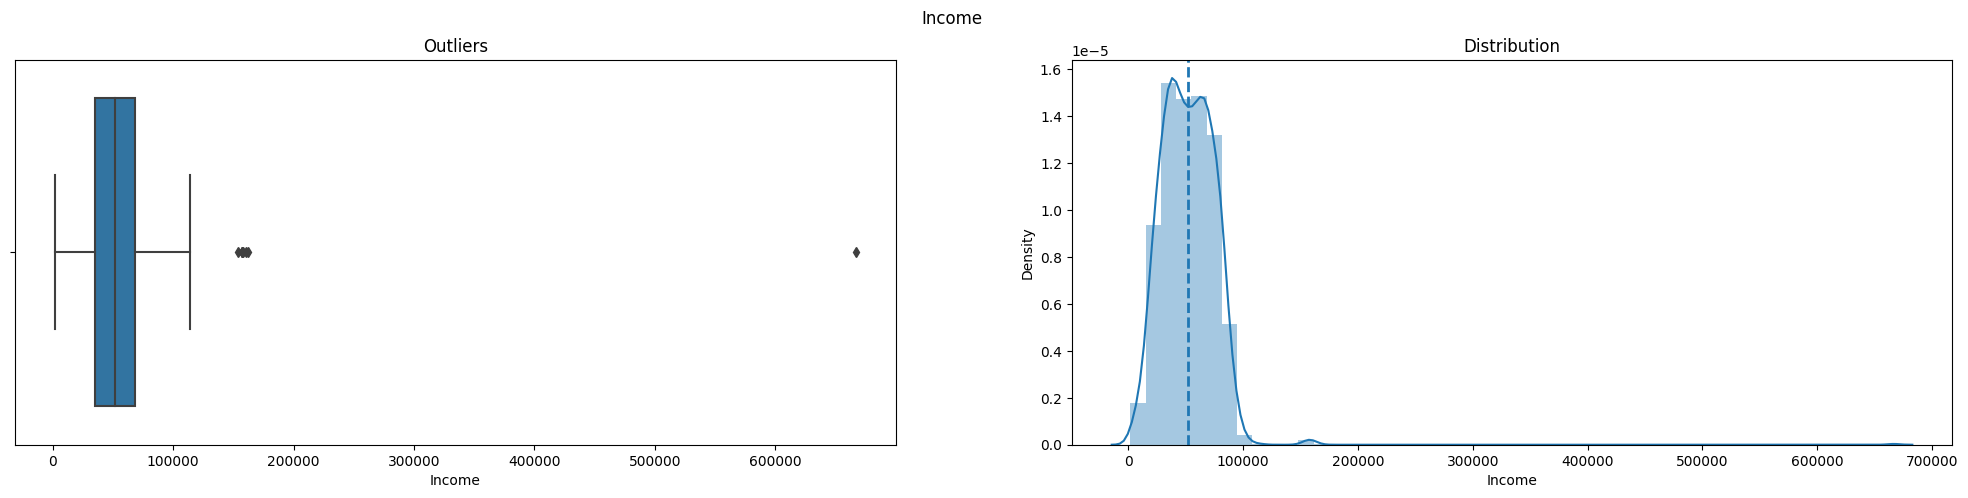

In [15]:
f, axes = plt.subplots(1, 2, figsize=(25,5))
f.suptitle('Income')

# Boxplot
sns.boxplot(data = df, x= 'Income', ax=axes[0])
axes[0].set_title('Outliers')

# Distplot
sns.distplot(df['Income'], ax=axes[1])
plt.axvline(x=df['Income'].mean(), linestyle='--', linewidth=2)
axes[1].set_title('Distribution')

plt.show();

‣ Outliers on Target Column

### Features Eda

In [16]:
df = df.rename(columns = {'MntWines':'Wines','MntFruits':'Fruits',
       'MntMeatProducts':'Meat', 'MntFishProducts':'Fish', 'MntSweetProducts':'Sweet',
       'MntGoldProds':'Gold'})

In [18]:
#color pallet and theme
import matplotlib.colors

colors = ["#B71C1B","#D72A2B","#F2ECC6","#D5D68A","#A6AD3C","#798517"]
colors2 = ["#F2ECC6","#D5D68A","#A6AD3C","#798517","#D72A2B"]

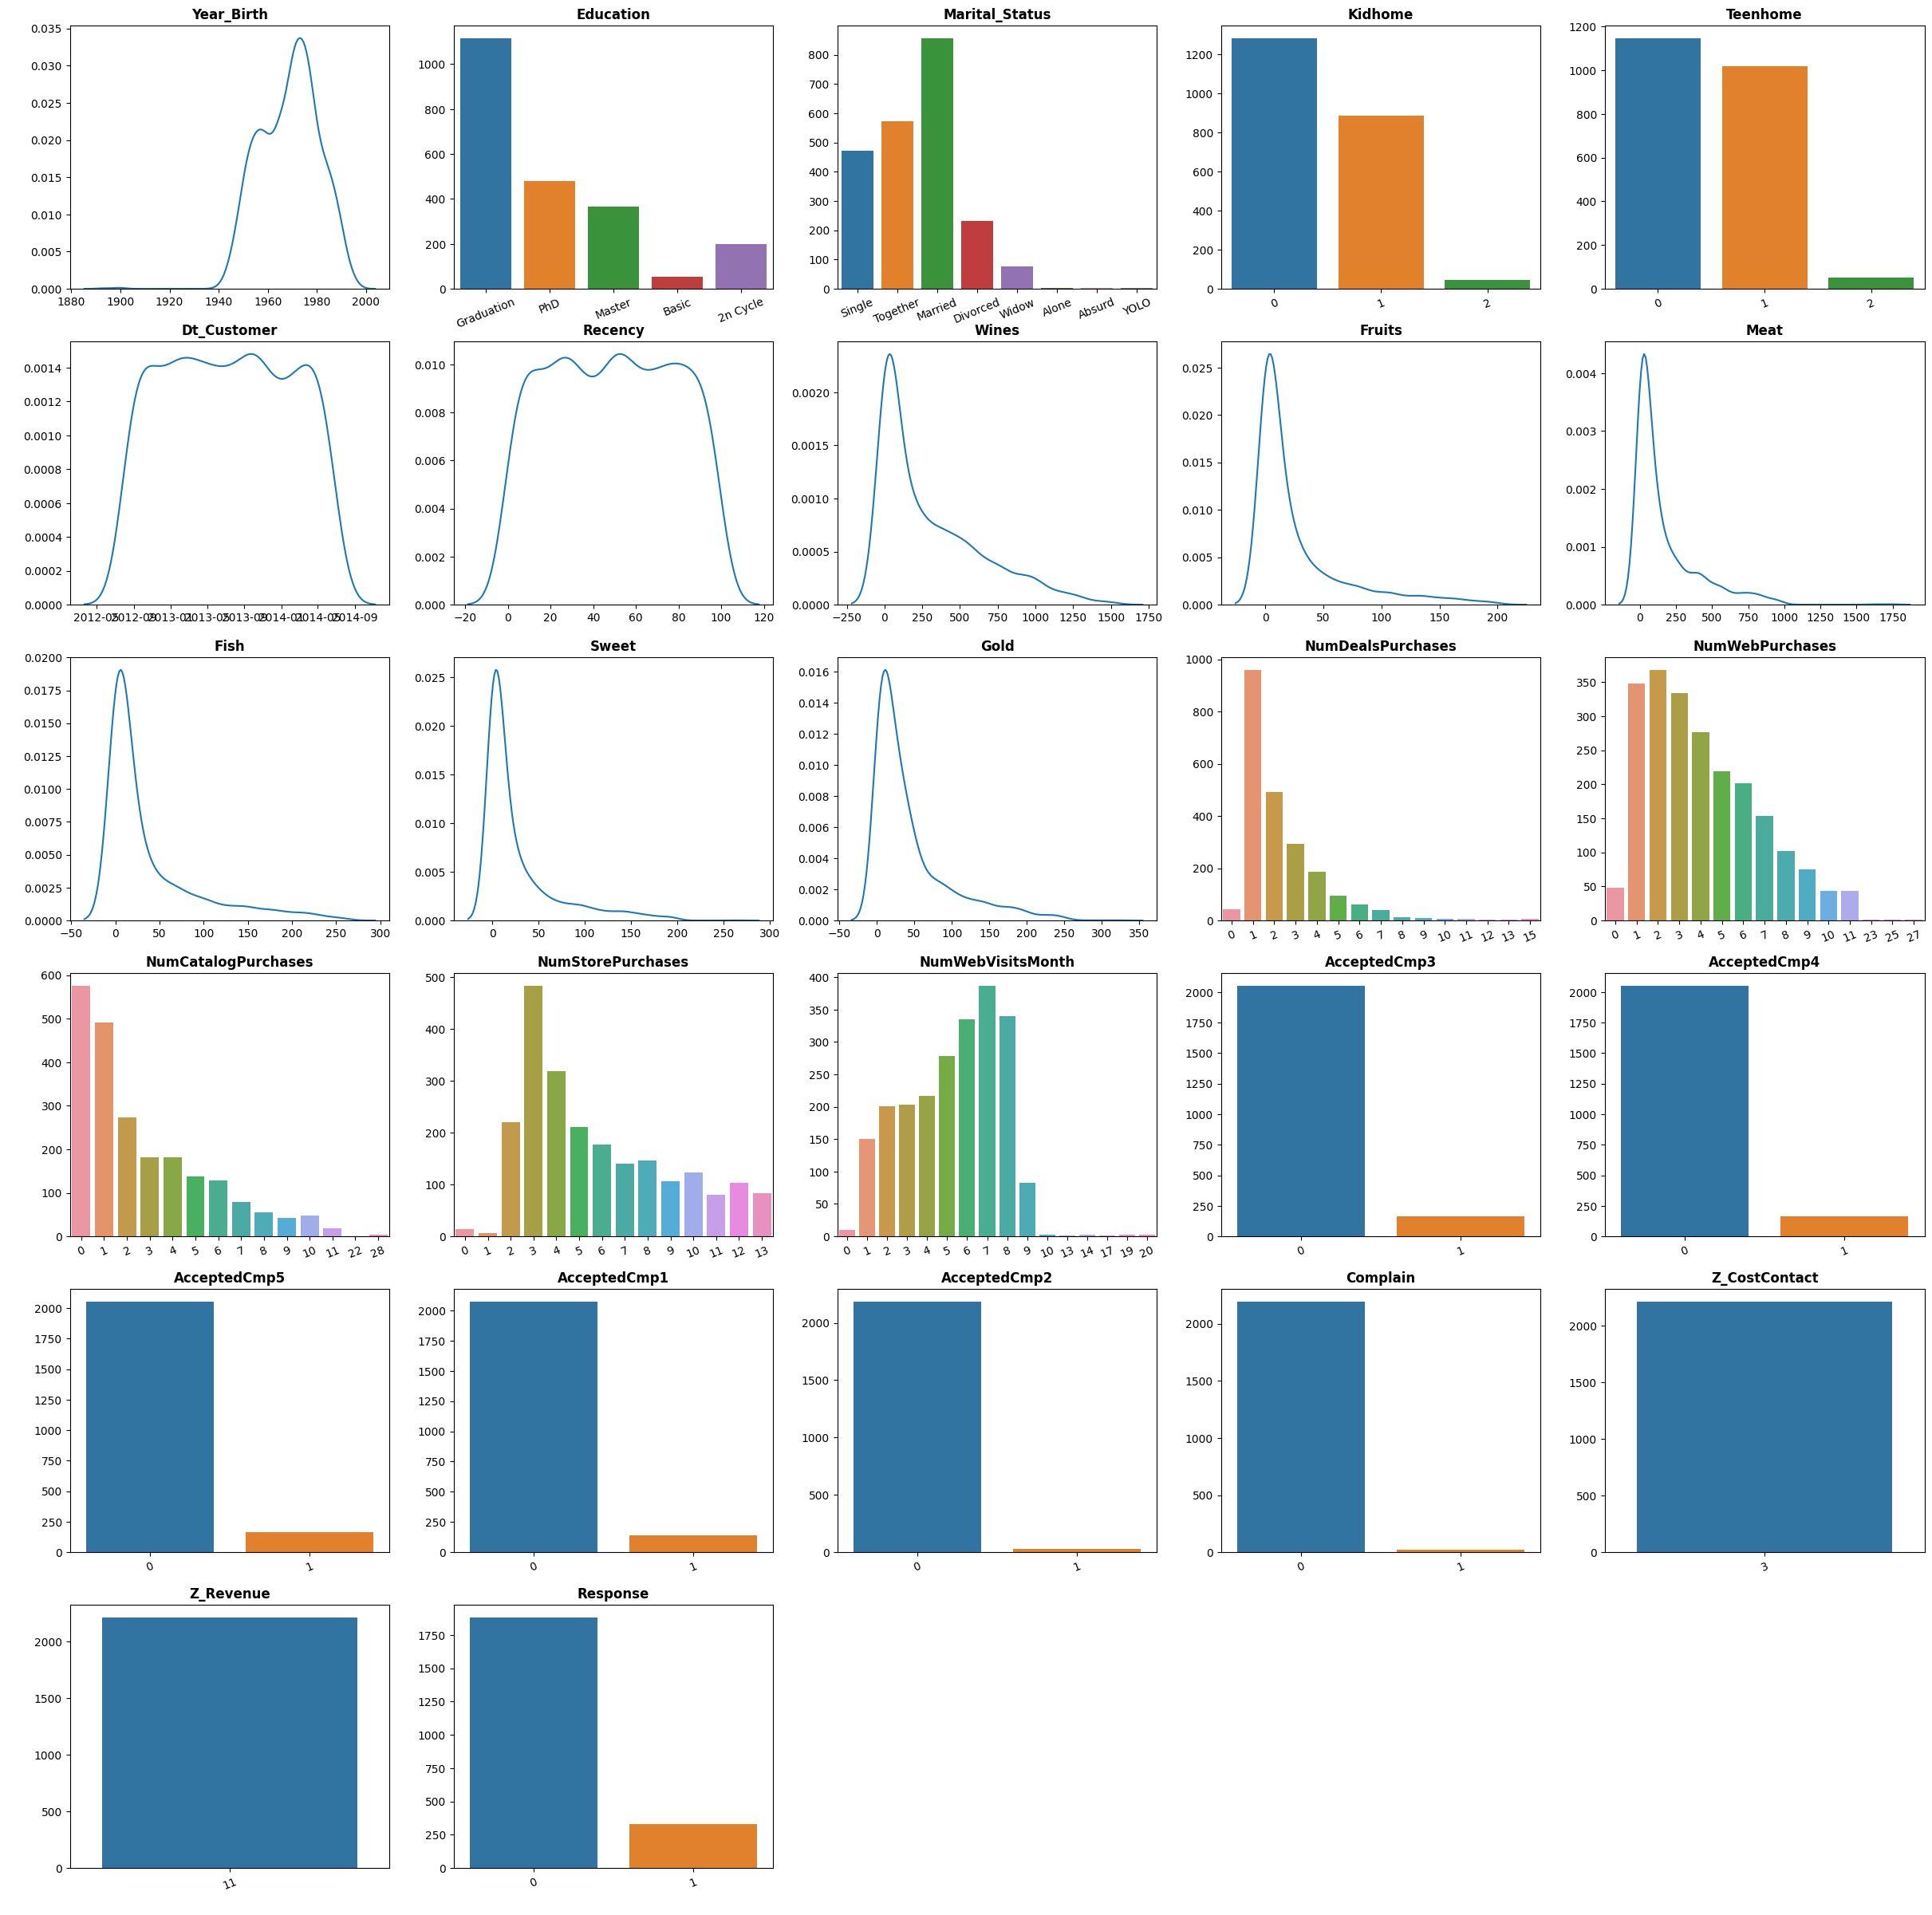

In [22]:
cols = [col for col in df.columns if col not in ['id', 'Income']]
count = [col for col in cols if col not in ['Dt_Customer', 'Year_Birth', 'Recency','Wines', 'Fruits', 'Meat','Fish', 'Sweet', 'Gold']]

plt.figure(figsize= (30,30))
for i, col in enumerate(df[cols].columns):
    plt.subplot(6,5,i+1)
    if col in count:
        plt.title(col,weight = 'bold')
        A =sns.countplot(data=df, x=col)
        plt.xlabel(' ')
        plt.ylabel(" ")
        
        #patch
        patch_h = []    
        for patch in A.patches:
            reading = patch.get_height()
            patch_h.append(reading) 
        idx_tallest = np.argmax(patch_h)   
        A.patches[idx_tallest]
    
        plt.xticks(rotation=22)
        
    else:
        plt.title(col,weight = 'bold')
        sns.kdeplot(df[col])
        plt.ylabel(" ")
        plt.xlabel(" ")

‣ **Z_CostContact** and **Z_Revenue** can be removed as this doesn't have any other values 

In [23]:
#Dropping more features 
to_drop = ["Marital_Status", "Dt_Customer", "Z_CostContact", "Z_Revenue"]
df = df.drop(to_drop, axis=1)

### Corelation

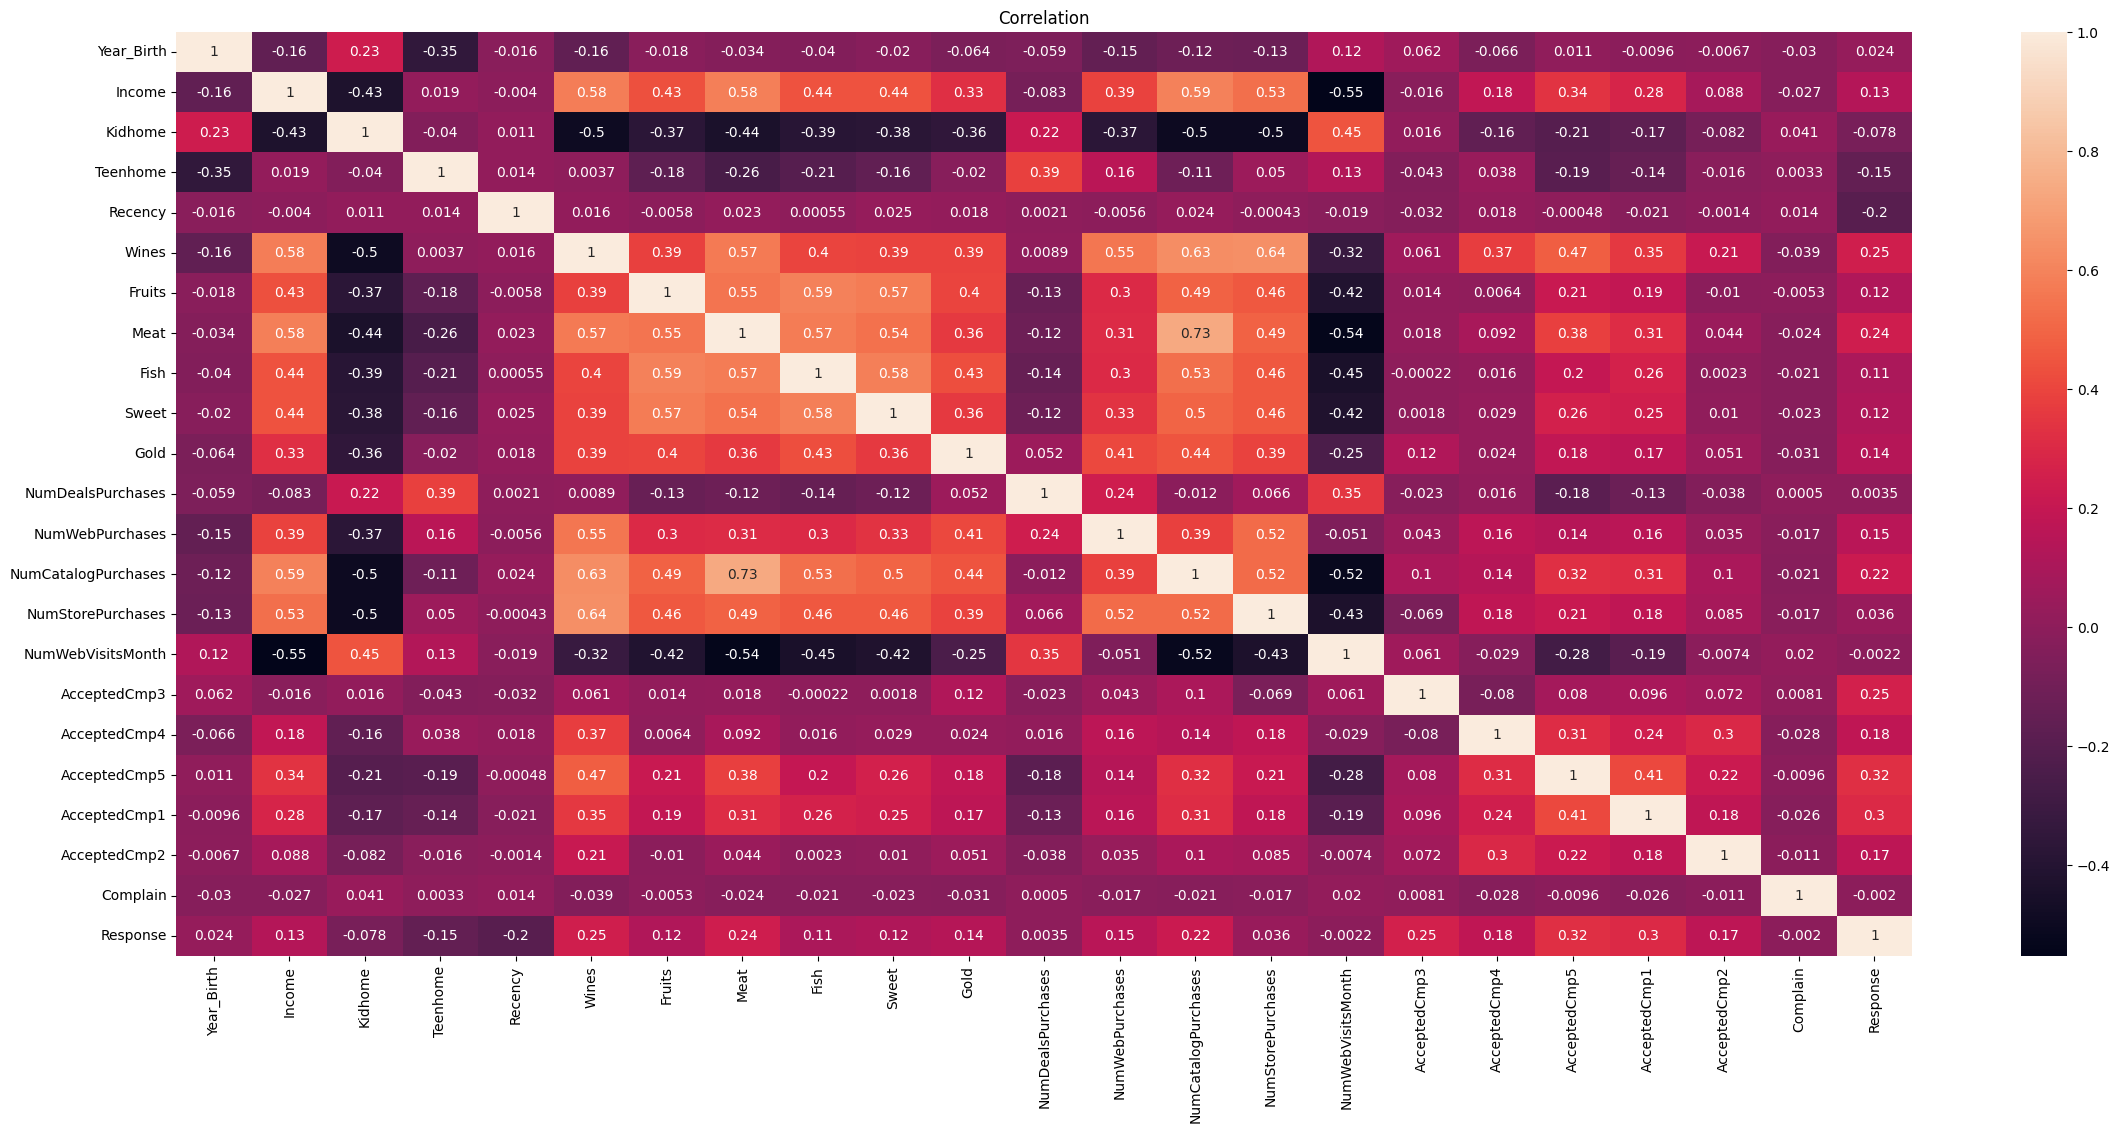

In [25]:
plt.figure(figsize=(28,12))
plt.title('Correlation')
sns.heatmap(df.corr(), annot=True);

## DATA PREPROCESSING

In [26]:
from sklearn import preprocessing

In [27]:
cat = []
for i in df.columns:
    if (df[i].dtypes == "object"):
        cat.append(i)
        
print("Object Columns",cat)

Object Columns ['Education']


In [28]:
#Encoding categorical labels
le=preprocessing.LabelEncoder()

for i in cat:
    df[i]=df[[i]].apply(le.fit_transform)


In [29]:
from sklearn.preprocessing import StandardScaler

#Creating a copy of data
ndf = df.copy()
# creating a subset of dataframe by dropping the features on deals accepted and promotions
rem_col = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2', 'Complain', 'Response']
ndf = ndf.drop(rem_col, axis=1)

In [30]:
#Scaling
scaler = StandardScaler()
scaler.fit(ndf)

scaled_data = pd.DataFrame(scaler.transform(ndf),columns= ndf.columns )


## DIMENSIONALITY REDUCTION

In [31]:
from sklearn.decomposition import PCA

#Initiating PCA to reduce dimentions aka features to 3
pca = PCA(n_components=3)
pca.fit(scaled_data)
PCA_ds = pd.DataFrame(pca.transform(scaled_data), columns=(["col1","col2", "col3"]))
PCA_ds.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,2216.0,-3.206420e-17,2.468269,-5.126542,-2.291454,-0.606909,2.155330,6.556611
col2,2216.0,3.206420e-17,1.419328,-3.045323,-1.134781,-0.144747,1.039639,4.874833
col3,2216.0,1.282568e-17,1.160210,-4.375640,-0.775545,-0.011188,0.683983,5.562569


In [32]:
import plotly.graph_objects as go
import numpy as np

x =PCA_ds["col1"]
y =PCA_ds["col2"]
z =PCA_ds["col3"]

fig = go.Figure(data=[go.Scatter3d(
    x=x,
    y=y,
    z=z,
    mode='markers',
    marker=dict(
        size=6,
        color=z,                
        colorscale=colors,   
        opacity=0.8
    )
)])

fig.show()

## CLUSTERING

### Elbow Method

Elbow Method:


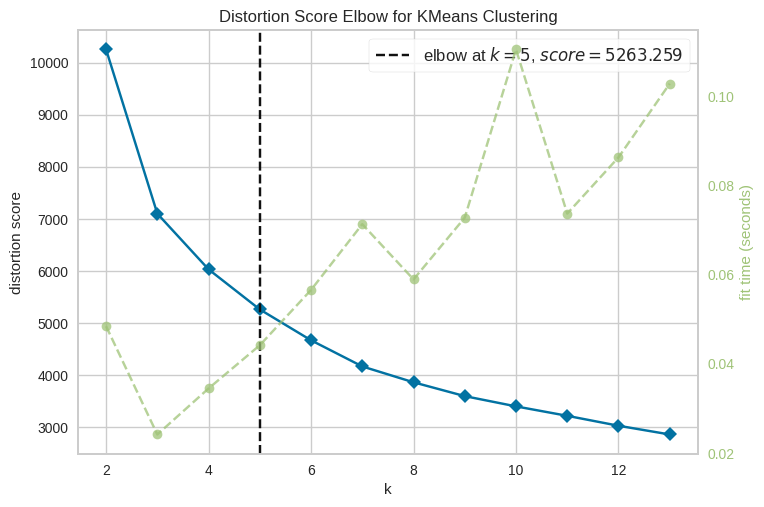

In [33]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

# Quick examination of elbow method to find numbers of clusters to make.
print('Elbow Method:')
Elbow_M = KElbowVisualizer(KMeans(), k=13)
Elbow_M.fit(PCA_ds)
Elbow_M.show();

### K - means Clustering


In [34]:
from sklearn.cluster import AgglomerativeClustering

#Initiating the Agglomerative Clustering model 
AC = AgglomerativeClustering(n_clusters=5)
# fit model and predict clusters
yhat_AC = AC.fit_predict(PCA_ds)
PCA_ds["Clusters"] = yhat_AC
#Adding the Clusters feature to the orignal dataframe.
df["Clusters"]= yhat_AC

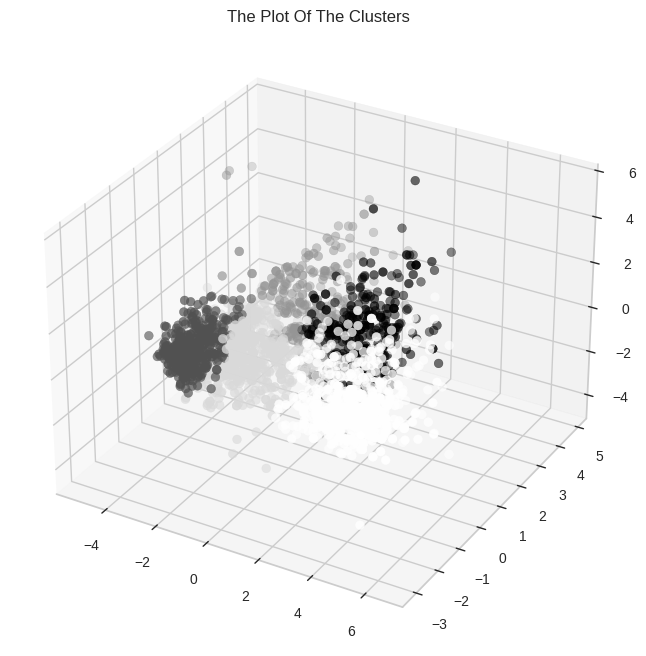

In [35]:
#Plotting the clusters
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=PCA_ds["Clusters"], marker='o')
ax.set_title("The Plot Of The Clusters")
plt.show()